In [1]:
import tensorflow as tf

tf.__version__

'2.2.0'

Keras makes available some models that were previously trained for image classification [rigth here](http://www.keras.io/applications).  
Let's take a look at **ResNet50**.

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50

# The imagenet parameters tells the constructor to get the weigths that resulted on training on the 
# imagenet dataset
model = ResNet50(weights = 'imagenet')

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

 As you can see, this model is huge! So it may take a little to download it. It is downloaded it a hidden subdirectory called `/.keras/models/`.  
Another really interesting parameter is `include_top`, which by default is True. If you set it to False you won't load the *head* of the model, so you can use it for things like **transfer learning**.

In [8]:
model = ResNet50(weights = 'imagenet', include_top = False)

model.summary()

94773248/94765736 [==============================] - 46s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_________________________

In [10]:
model = ResNet50(weights = 'imagenet')

In [25]:
from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img('limon.jpg', target_size = (224, 224))
ball_img = load_img('tb.jpg', target_size = (224, 224))

In [26]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

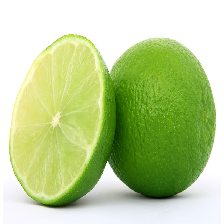

In [27]:
lemon_img

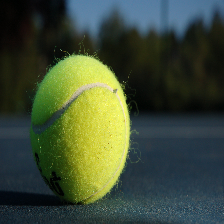

In [29]:
ball_img

In [21]:
get_top_5_predictions(lemon_img)

40960/35363 [==================================] - 0s 1us/step


,prediction,probability
1,lemon,0.979288
2,orange,0.00523557
3,Granny_Smith,0.00469597
4,jackfruit,0.00342217
5,tennis_ball,0.00202819


In [30]:
get_top_5_predictions(ball_img)

,prediction,probability
1,tennis_ball,0.999976
2,racket,2.33398e-05
3,soccer_ball,1.12071e-07
4,volleyball,7.56315e-08
5,ping-pong_ball,5.25695e-08
